In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
binder_original = pd.read_csv('./binder_original.csv', index_col=0)

In [3]:
binder_wm = pd.read_csv('./binder_wm.csv', index_col=0)

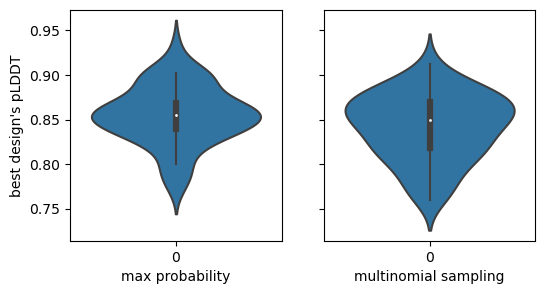

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3),  sharey=True)
sns.violinplot(binder_original.groupby('sample')['pLDDT'].max().values, ax=axes[0])
axes[0].set_ylabel("best design's pLDDT")
axes[0].set_xlabel('max probability')
sns.violinplot(binder_wm.groupby('sample')['pLDDT'].max().values,  ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_xlabel('multinomial sampling')
plt.show()

In [8]:
motif_original = pd.read_csv('./motif_original.csv', index_col=0)
motif_wm = pd.read_csv('./motif_wm.csv', index_col=0)

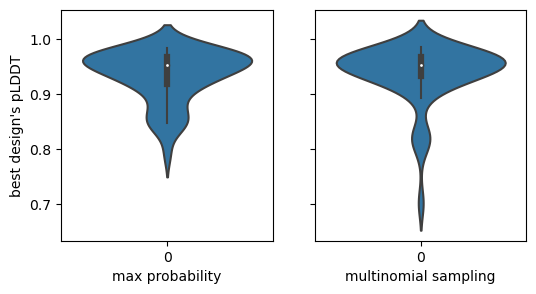

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3),  sharey=True)
sns.violinplot(motif_original.groupby('sample')['pLDDT'].max().values, ax=axes[0])
axes[0].set_ylabel("best design's pLDDT")
axes[0].set_xlabel('max probability')
sns.violinplot(motif_wm.groupby('sample')['pLDDT'].max().values,  ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_xlabel('multinomial sampling')
plt.show()

In [10]:
seq_original = pd.read_csv('./sequence_conditioned_original.csv', index_col=0)
seq_wm = pd.read_csv('./sequence_conditioned_wm.csv', index_col=0)

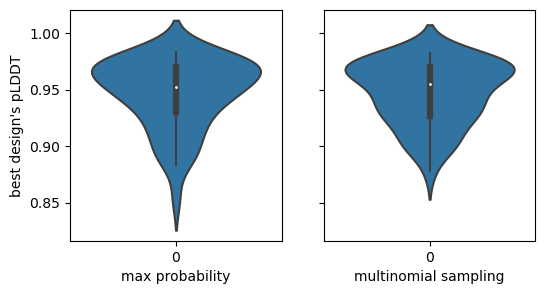

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3),  sharey=True)
sns.violinplot(seq_original.groupby('sample')['pLDDT'].max().values, ax=axes[0])
axes[0].set_ylabel("best design's pLDDT")
axes[0].set_xlabel('max probability')
sns.violinplot(seq_wm.groupby('sample')['pLDDT'].max().values,  ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_xlabel('multinomial sampling')
plt.show()

In [ ]:
secstruct_original = pd.read_csv('./secondary_structure_original.csv', index_col=0)
secstruct_wm = pd.read_csv('./secondary_structure_wm.csv', index_col=0)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3),  sharey=True)
sns.violinplot(secstruct_original.groupby('sample')['pLDDT'].max().values, ax=axes[0])
axes[0].set_ylabel("best design's pLDDT")
axes[0].set_xlabel('max probability')
sns.violinplot(secstruct_wm.groupby('sample')['pLDDT'].max().values,  ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_xlabel('multinomial sampling')
plt.show()